In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# 定义一个函数用于从文件中读取复数并存储到列表中
def read_complex_numbers_from_file(file_path):
    complex_numbers = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for i in range(0, len(lines), 2):
            real_part = float(lines[i].strip())
            imag_part = float(lines[i+1].strip())
            complex_numbers.append(complex(real_part, imag_part))
    return complex_numbers

# 文件夹路径
folder_path = 'data'

# 读取每个文件中的复数并存储到列表
data = []
complex_numbers_list = []
for i in range(48):
    file_name = f'data{i}.txt'
    file_path = os.path.join(folder_path, file_name)
    if os.path.exists(file_path):
        complex_numbers = read_complex_numbers_from_file(file_path)
        data.append(complex_numbers)
    #data.append(complex_numbers_list)
    complex_numbers_list = []

PSS_data = []
complex_numbers_list = []
for i in range(3):
    file_name = f'PSS{i}.txt'
    file_path = os.path.join(folder_path, file_name)
    if os.path.exists(file_path):
        complex_numbers_list = read_complex_numbers_from_file(file_path)
    PSS_data.append(complex_numbers_list)
    complex_numbers_list = []

In [2]:
def relevant_test(data_index,pss_index):
    max = 0
    ret_list = []
    for i in range(len(data[data_index])-len(PSS_data[pss_index])):
        ret = complex(0,0)
        for j in range(len(PSS_data[pss_index])):
            # ret = ret + data[data_index][j+i] * PSS_data[pss_index][j].conjugate()
            ret = ret + data[data_index][j+i] * PSS_data[pss_index][j]
            ret_list.append(abs(ret))
        if(abs(ret)>max):
            position = i
            max = abs(ret)
    return max,position,ret_list

In [3]:
def get_power(complex_list):
    pow = 0
    for i in complex_list:
        pow += abs(i)
    return pow

pow_dict = {}
for i in range(12):
    pow_dict[i] = get_power(data[i])

sorted_items = sorted(pow_dict.items(), key=lambda x: x[1], reverse=True)
top_six_indices = [key for key, value in sorted_items[:6]]
print(sorted_items[:6])
print(top_six_indices)

[(6, 32213499.828282077), (0, 28854743.59357442), (7, 22930454.519809652), (4, 17724917.37866365), (10, 15290082.637896031), (1, 9085923.661302825)]
[6, 0, 7, 4, 10, 1]


In [4]:
'RUN TIME WARNING 3MIN'
result = {}
#计算
for pss_index in range(len(PSS_data)):
    print(f'PSS{pss_index}:')
    for data_index in top_six_indices:
        max,position,ret_list = relevant_test(data_index,pss_index)
        print(f'data{data_index}:',max,'position:',position)
        result[f'PSS{pss_index}-data{data_index}'] = [max,position,ret_list]

#排序
max_values = {}
for key, value in result.items():
    pss, data_num = key.split('-')
    if pss not in max_values or value[0] > max_values[pss][0]:
        max_values[pss] = (value[0], data_num)

# 输出结果
for pss, (max_val, data_num) in max_values.items():
    print(f"{pss} corresponds to {data_num}")


PSS0:
data6: 2477183.259779564 position: 11882
data0: 2678212.178905286 position: 2501
data7: 4170287.6540433196 position: 6883
data4: 2488778.2850803756 position: 4569
data10: 1098243.744681774 position: 164
data1: 1605366.8491582784 position: 10570
PSS1:
data6: 2353013.527005401 position: 12089
data0: 2449533.4856999386 position: 8586
data7: 3909197.808363807 position: 7328
data4: 2537647.205936915 position: 4908
data10: 1162683.7716325552 position: 703
data1: 3399183.385246607 position: 10271
PSS2:
data6: 2791073.9856428117 position: 12396
data0: 2689117.126556547 position: 8625
data7: 5189658.629410912 position: 12749
data4: 2297490.436312167 position: 5561
data10: 1268097.8622256191 position: 450
data1: 3678112.050827165 position: 10275
PSS0 corresponds to data7
PSS1 corresponds to data7
PSS2 corresponds to data7


In [5]:
result

{'PSS0-data6': [2477183.259779564,
  11882,
  [15127.489548588494,
   29961.768709569198,
   21386.629109124937,
   31445.75722816096,
   34656.30421336278,
   22922.79449592571,
   27797.160674735675,
   25142.78809963622,
   23049.06796668895,
   20912.609872557157,
   28996.197252092043,
   44918.345200532036,
   48852.364513022556,
   38396.92073176032,
   29726.400765386432,
   27547.05210493179,
   28586.7747323635,
   28551.117270646853,
   27207.112093791664,
   26722.669134505748,
   31700.593106168595,
   38718.48300489623,
   38643.33039116478,
   33115.99432675439,
   34302.27670252943,
   44549.319394244536,
   58993.30296092675,
   60960.639848783416,
   53461.11432928317,
   55923.52238619634,
   55055.44793620039,
   40012.93260551766,
   19774.8550544982,
   14955.336921850974,
   14963.195028308242,
   31011.008835234712,
   48669.630594030714,
   54509.896795907225,
   51641.18598857282,
   51910.10430129327,
   75133.98087898835,
   93218.89646456947,
   73695.73011

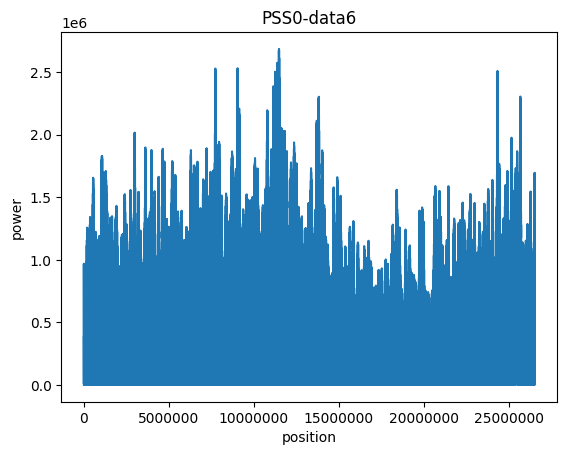

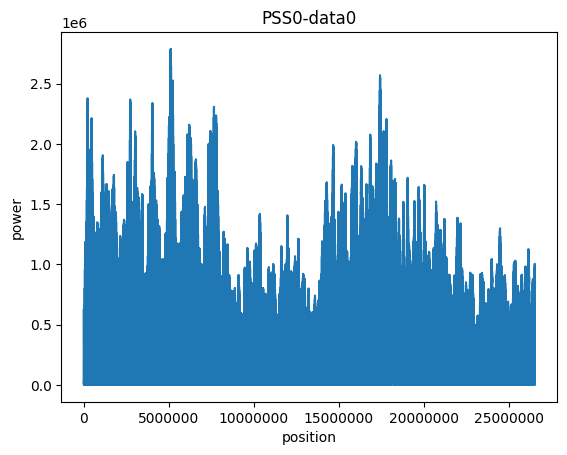

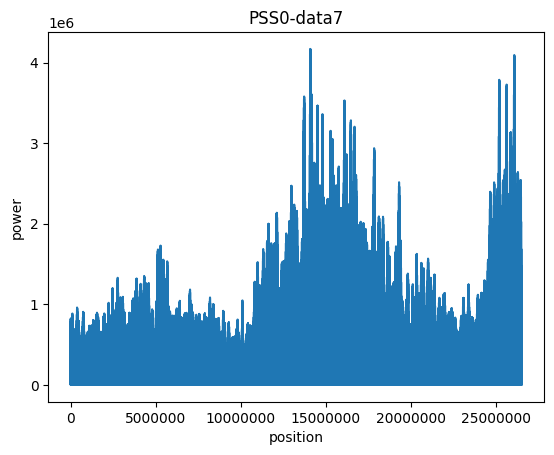

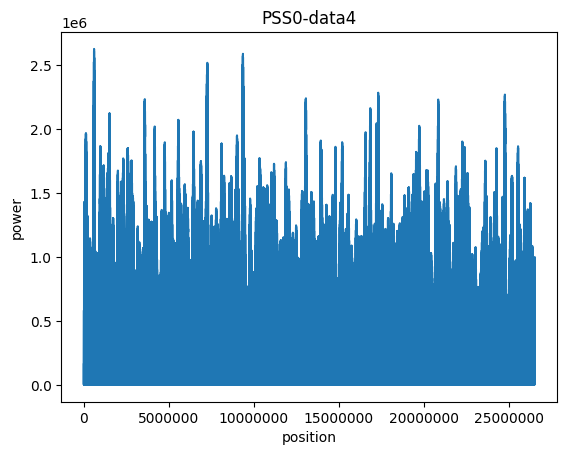

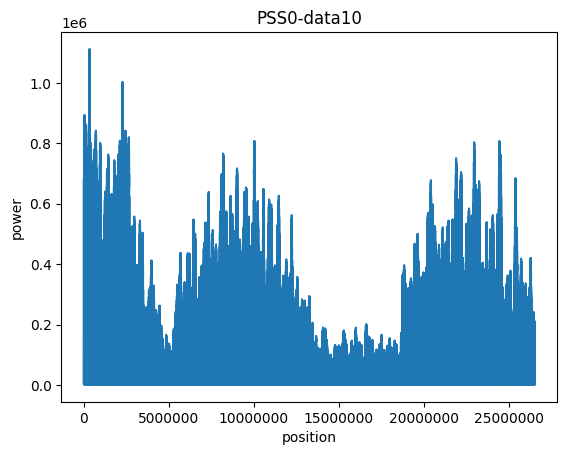

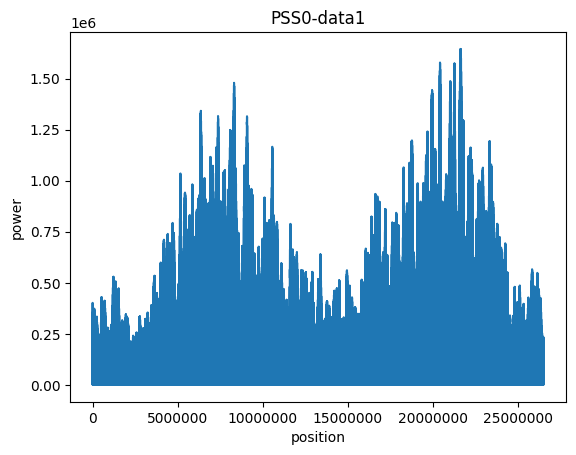

In [6]:
# RUN TIME WARNING
pss_index = 0
for data_index in top_six_indices:
    list = result[f'PSS{pss_index}-data{data_index}'][2]
    x = np.arange(len(list))
    y = list
    plt.plot(x, y)
    plt.title(f'PSS{pss_index}-data{data_index}')
    plt.xlabel('position')
    plt.ylabel('power')
    plt.ticklabel_format(style='plain', axis='x')
    plt.show()

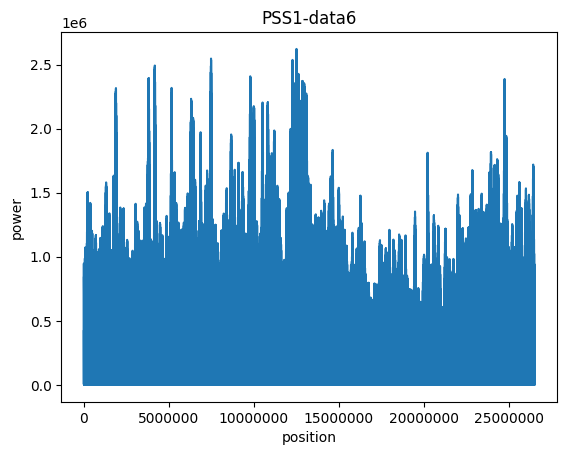

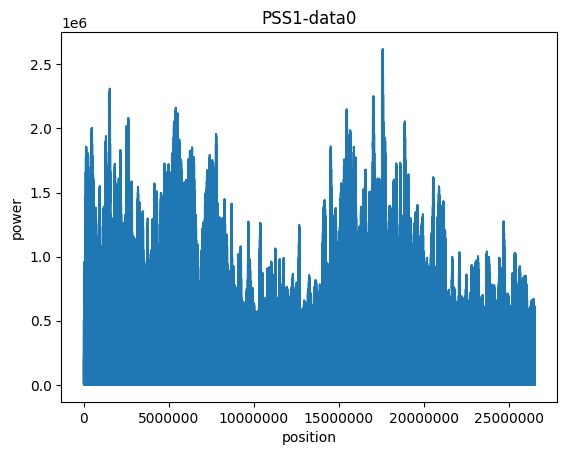

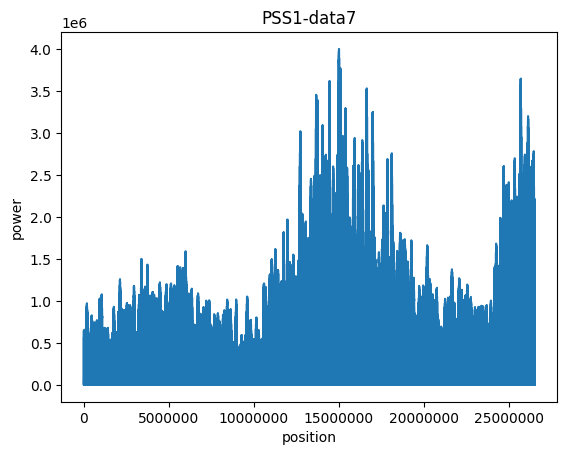

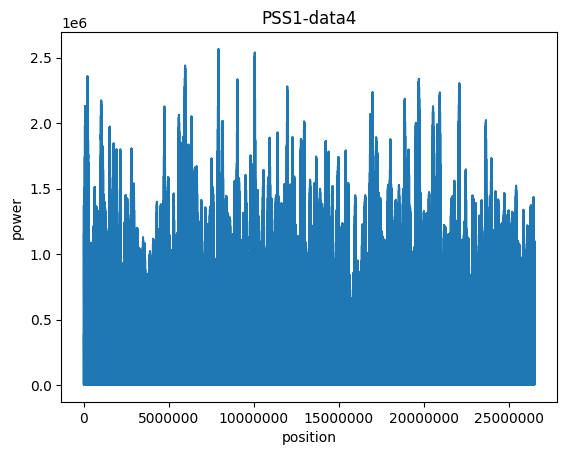

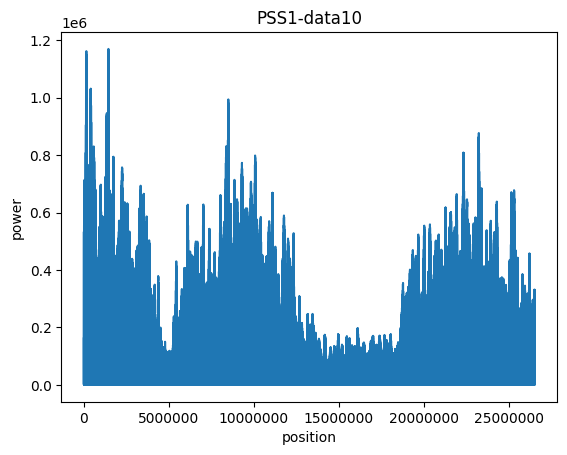

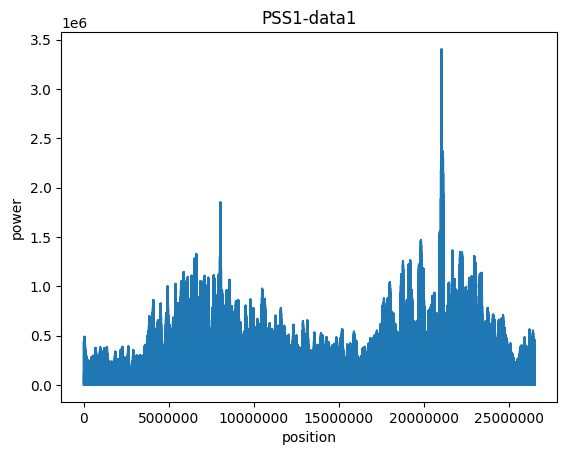

In [7]:
pss_index = 1
for data_index in top_six_indices:
    list = result[f'PSS{pss_index}-data{data_index}'][2]
    x = np.arange(len(list))
    y = list
    plt.plot(x, y)
    plt.title(f'PSS{pss_index}-data{data_index}')
    plt.xlabel('position')
    plt.ylabel('power')
    plt.ticklabel_format(style='plain', axis='x')
    plt.show()

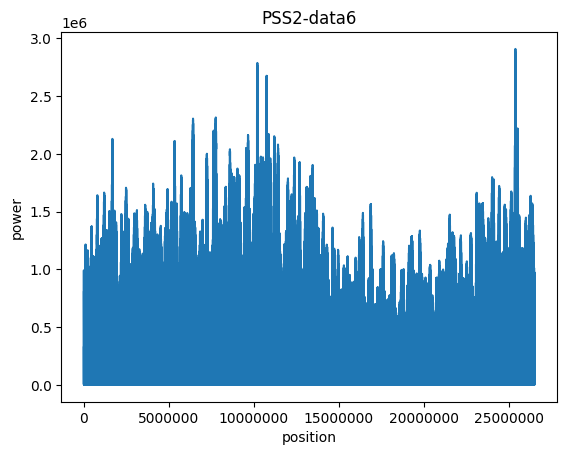

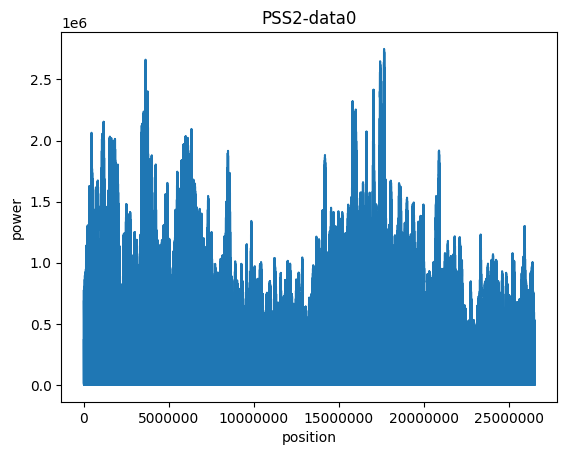

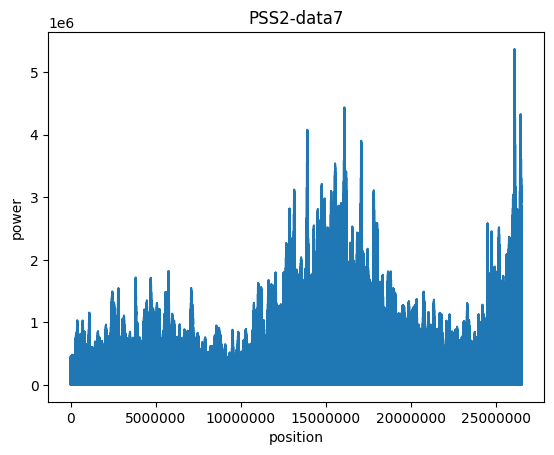

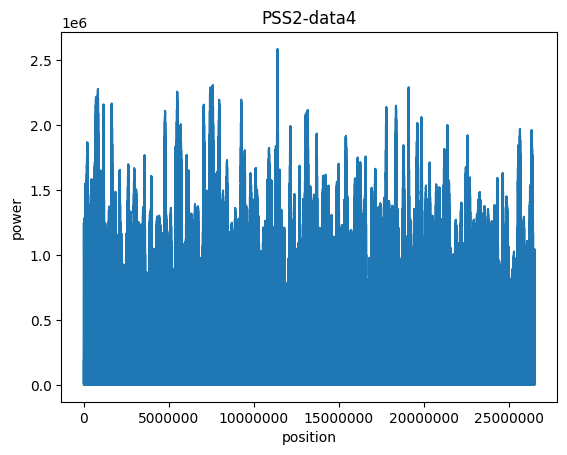

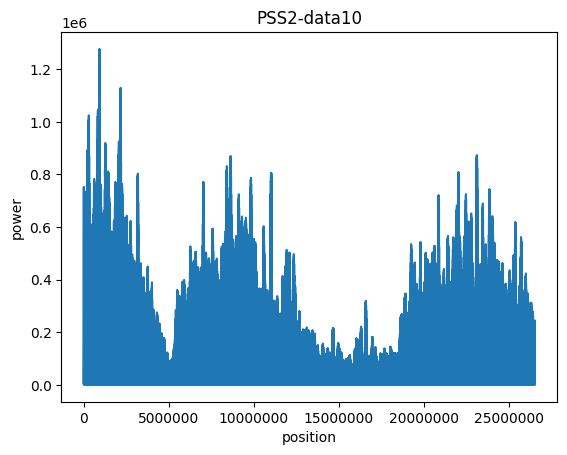

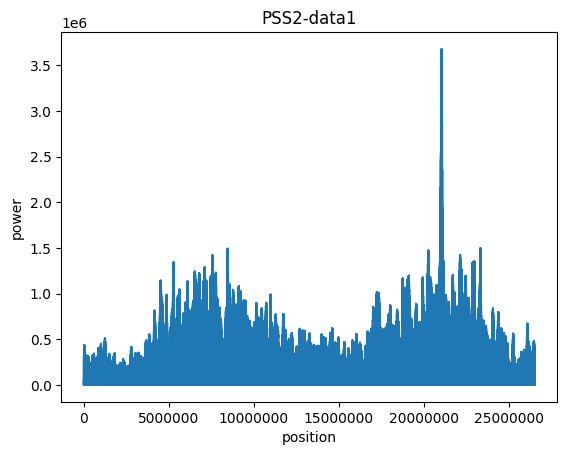

In [8]:
pss_index = 2
for data_index in top_six_indices:
    list = result[f'PSS{pss_index}-data{data_index}'][2]
    x = np.arange(len(list))
    y = list
    plt.plot(x, y)
    plt.title(f'PSS{pss_index}-data{data_index}')
    plt.xlabel('position')
    plt.ylabel('power')
    plt.ticklabel_format(style='plain', axis='x')
    plt.show()